In [2]:
import requests
import librosa
import tarfile
import os
import matplotlib.pyplot as plt
import numpy as np
import IPython
from librosa.display import specshow
from PIL import Image
import gc

In [3]:
url = "http://download.tensorflow.org/data/speech_commands_v0.01.tar.gz"
r = requests.get(url, allow_redirects=True)
open('speech_commands_v0.01.tar.gz', 'wb').write(r.content)
with tarfile.open('speech_commands_v0.01.tar.gz', 'r:gz') as tar:
    tar.extractall(path='./data')

In [23]:
digits = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven',
          'eight', 'nine']

In [5]:
for digit in digits:
    print(digit, ": ", len(os.listdir('/content/data/'+digit)))

zero :  2376
one :  2370
two :  2373
three :  2356
four :  2372
five :  2357
six :  2369
seven :  2377
eight :  2352
nine :  2364


In [6]:
n_fft = 1024
hop_length = 256
n_mels = 40
f_min = 20
f_max = 8000
sample_rate = 16000

In [7]:
filename = '/content/data/zero/004ae714_nohash_1.wav'
clip, sample_rate = librosa.load(filename, sr=None)

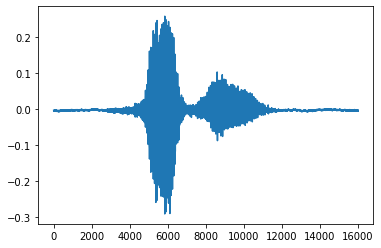

In [8]:
plt.plot(clip)
plt.show()

In [9]:
IPython.display.Audio(filename) 

In [10]:
n_fft = 1024  # frame length 
x = clip[:n_fft]
X = np.fft.fft(x, n_fft)
X_magnitude, X_phase = librosa.magphase(X)
X_magnitude_db = librosa.amplitude_to_db(X_magnitude)

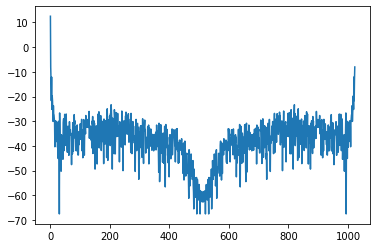

In [11]:
plt.plot(X_magnitude_db)
plt.show()

In [12]:
stft = librosa.stft(clip, n_fft=n_fft, hop_length=hop_length)
stft_magnitude, stft_phase = librosa.magphase(stft)
stft_magnitude_db = librosa.amplitude_to_db(stft_magnitude)

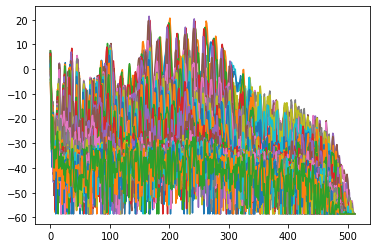

In [13]:
plt.plot(stft_magnitude_db)
plt.show()

In [14]:
mel_spec = librosa.feature.melspectrogram(clip, n_fft=n_fft,
                                          hop_length=hop_length, n_mels=n_mels,
                                          sr=sample_rate, power=1.0, fmin=f_min,
                                          fmax=f_max)
mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)

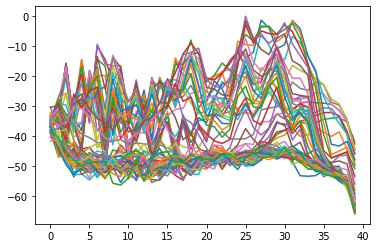

In [15]:
plt.plot(mel_spec_db)
plt.show()

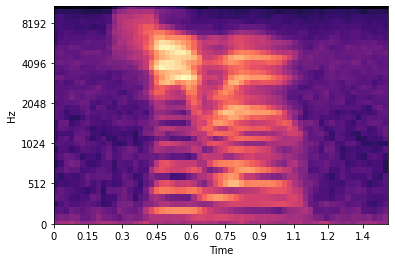

In [16]:
specshow(mel_spec_db, x_axis='time', y_axis='mel')

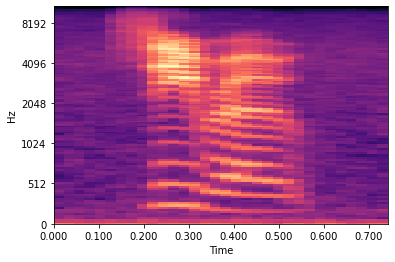

In [17]:
S = librosa.feature.melspectrogram(y=clip, sr=sample_rate)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), x_axis='time',
                         y_axis='mel')#, fmin=50, fmax=280)

In [18]:
def get_mel(label):
  for filename in os.listdir('/content/data/'+label):
    data, sr = librosa.load('/content/data/'+label+'/'+filename)
    
    fig = plt.figure(figsize=[1,1])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    
    S = librosa.feature.melspectrogram(y=data, sr=sr)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), x_axis='time',
                             y_axis='mel', fmin=f_min, fmax=f_max)
    newfile  = '/content/drive/MyDrive/Datasets/spokendigits/'+label+'/' + str(filename[:-4]) + '.jpg'
    plt.savefig(newfile, dpi=500, bbox_inches='tight',pad_inches=0)
    plt.close()
    del data, sr, fig, ax, S, newfile
    gc.collect()

In [20]:
import os
from google.colab import drive

drive.mount('/content/drive')

if os.path.exists('/content/drive/MyDrive/Datasets/spokendigits/') == False:
  os.mkdir('/content/drive/MyDrive/Datasets/spokendigits/')
  for number in digits:
    os.mkdir('/content/drive/MyDrive/Datasets/spokendigits/'+number)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
for dir in digits:
  get_mel(dir)

In [24]:
amount = []
for digit in digits:
    length = len(os.listdir('/content/drive/MyDrive/Datasets/spokendigits/'+digit))
    print(digit, ": ", length)
    amount.append(length)

zero :  2376
one :  2370
two :  2373
three :  2356
four :  2372
five :  2357
six :  2369
seven :  2377
eight :  2352
nine :  2364
